In [1]:
from quasinet.qnet import qdistance, save_qnet
from cognet.cognet import cognet as cg
from cognet.dataFormatter import dataFormatter
from cognet.model import model 
#import cognet.util
import pandas as pd
import numpy as np

In [2]:
## read in data, configure to Qnet specifications and fit Qnet model
data_obj=dataFormatter(samples="examples_data/PTSD_cognet_test_processed.csv")
features,samples = data_obj.Qnet_formatter()

In [3]:
fit = False
model_obj = model()
if fit:
    model_obj.fit(data_obj=data_obj, njobs=2)
    # model_obj.save("examples_results/PTSD_cognet_test.joblib")
    save_qnet(model_obj.myQnet, "examples_results/PTSD_cognet_test.joblib", low_mem=False)
else:
    model_obj.load("examples_results/PTSD_cognet_test.joblib")

In [4]:
# load Qnet, write mpi files for distance matrix
# run qdistance matrix with "./mpi_run.sh" command
cognet_obj = cg()
cognet_obj.load_from_model(model_obj, data_obj, 'all')
cognet_obj.samples

,ptsd1,ptsd2,ptsd3,ptsd4,ptsd5,ptsd6,ptsd7,ptsd8,ptsd9,ptsd10,...,ptsd202,ptsd203,ptsd204,ptsd205,ptsd206,ptsd207,ptsd208,ptsd209,ptsd210,ptsd211
0,4,2,5,4,2,3,2,3,3,2,...,2,4,4,3,2,3,2,2,4,2
1,3,2,3,3,1,3,2,2,2,1,...,3,4,4,3,3,3,4,3,4,5
2,2,2,2,4,1,3,3,2,2,4,...,4,2,2,4,4,2,3,2,2,5
3,2,2,5,1,3,2,1,2,2,1,...,1,2,3,3,3,2,1,1,2,2
4,4,1,1,1,2,2,1,1,1,2,...,2,2,2,2,1,1,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,4,2,3,4,1,1,1,1,3,2,...,2,2,2,2,2,2,2,2,2,3
300,5,2,2,4,4,3,2,5,4,4,...,5,5,5,5,4,5,5,4,4,5
301,5,1,2,1,1,3,5,5,3,4,...,4,3,3,2,3,1,3,2,5,5
302,2,1,3,3,1,2,2,2,1,1,...,1,1,1,1,1,2,2,2,2,2


In [ ]:
cognet_obj.dmat_filewriter("../examples_results/PTSD_cognet_test.joblib",
                           pyfile="PTSD_cognet.py",
                           NODES=4,T=2)

In [13]:
# random mask and reconstruction
cognet_obj.set_nsamples(20)
recon_df = cognet_obj.randomMaskReconstruction_multiple('examples_results/PTSD_randomMaskRecon_test.csv')
print("reconstruction results", recon_df)

reconstruction results                                                   5   \
0                                            42.5569   
1                                           0.221649   
2                                           0.371157   
3  [1, 1, 1, 1, 1, 2, 3, 2, 2, 1, 3, 3, 3, 3, 3, ...   
4  [4, 1, 2, 1, 1, 2, 3, , 2, 4, , , 3, 3, 3, 3, ...   
5  [2, 2, 2, 1, 1, 2, 3, 1, 3, 1, 2, 1, 3, 3, 3, ...   
6  [ptsd1, ptsd2, ptsd3, ptsd8, ptsd9, ptsd10, pt...   

                                                  1   \
0                                            40.2991   
1                                             0.2195   
2                                           0.419388   
3  [3, 2, 3, 3, 1, 3, 2, 2, 2, 1, 3, 1, 2, 2, 2, ...   
4  [, , 3, 3, 1, , 2, 2, 3, 1, 3, 1, 2, , , 3, 2,...   
5  [2, 2, 2, 3, 4, 3, 2, 2, 5, 1, 3, 1, 2, 2, 5, ...   
6  [ptsd1, ptsd2, ptsd3, ptsd5, ptsd6, ptsd9, pts...   

                                                  16  \
0                      

In [37]:
qdistance(np.array(data_obj.samples.iloc[3]), np.array(data_obj.samples.iloc[4]), model_obj.myQnet, model_obj.myQnet)
#samples.shape
#len(model_obj.myQnet.feature_names)

0.0

In [41]:
qdistance(samples[3],samples[4], model_obj.myQnet, model_obj.myQnet)
#samples.shape
#len(model_obj.myQnet.feature_names)

0.09268731566380256

In [44]:
print(samples[3])
print(np.array(data_obj.samples.iloc[3]))

['2' '2' '5' '1' '3' '2' '1' '2' '2' '1' '2' '3' '3' '3' '3' '1' '3' '2'
 '2' '1' '1' '1' '1' '3' '3' '2' '3' '4' '3' '3' '1' '2' '4' '3' '3' '3'
 '3' '1' '3' '2' '3' '4' '2' '3' '3' '1' '1' '3' '3' '3' '1' '3' '4' '1'
 '1' '2' '2' '1' '1' '4' '3' '1' '1' '1' '2' '1' '1' '2' '2' '1' '1' '2'
 '2' '2' '2' '2' '2' '1' '2' '2' '1' '3' '1' '3' '3' '2' '2' '1' '2' '2'
 '1' '1' '3' '3' '2' '1' '1' '4' '1' '2' '1' '1' '4' '2' '2' '1' '1' '4'
 '3' '2' '1' '1' '3' '4' '2' '2' '1' '1' '1' '2' '2' '1' '3' '3' '2' '2'
 '1' '1' '1' '2' '1' '2' '2' '1' '1' '1' '1' '2' '1' '1' '1' '1' '1' '2'
 '1' '1' '2' '3' '2' '1' '1' '1' '2' '2' '2' '1' '1' '2' '1' '1' '1' '1'
 '1' '1' '2' '1' '1' '1' '1' '1' '2' '1' '1' '1' '2' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '2' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '2' '1' '1' '1' '2' '3' '3' '3' '2' '1' '1' '2' '2']
[2 2 5 1 3 2 1 2 2 1 2 3 3 3 3 1 3 2 2 1 1 1 1 3 3 2 3 4 3 3 1 2 4 3 3 3 3
 1 3 2 3 4 2 3 3 1 1 3 3 3 1 3 4 1 1 2 2 1 1 4 3 1 1 1 2 1 1 2 2 1 1

In [16]:
data_obj.samples.iloc[2]

ptsd1      2
ptsd2      2
ptsd3      2
ptsd4      4
ptsd5      1
          ..
ptsd207    2
ptsd208    3
ptsd209    2
ptsd210    2
ptsd211    5
Name: 2, Length: 211, dtype: int64

In [5]:
# compute dissonance matrix
return_dict = cognet_obj.dissonance_matrix(output_file="mpi_tmp/PTSD_dissonance_matrix.csv", n_jobs=4)
return_dict

,1,0,2,3,4,5,7,6,8,9,...,294,297,295,296,299,298,301,300,303,302
0,0.437094,0.313228,0.295881,0.179128,0.429667,0.000000,0.193852,0.062746,0.000000,0.302673,...,0.491555,0.003474,0.000000,0.313168,0.327907,0.408121,0.000000,0.000000,0.037938,0.222737
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.250358,0.407235,0.987317,0.000000,0.462832,...,0.000000,0.158092,0.000000,0.533792,0.000000,0.459066,0.427904,0.000000,0.000000,0.516162
2,0.212940,0.260354,0.000000,0.565712,0.115074,0.000000,0.216896,0.122889,0.628796,0.000000,...,0.173508,0.129928,0.000000,0.000000,0.208672,0.237532,0.000000,0.000000,0.000000,0.258498
3,0.000000,0.241938,0.240584,0.460322,0.000000,0.000000,0.328023,0.646208,0.426067,0.399100,...,0.000000,0.380835,0.000000,0.000000,0.250533,0.376358,0.428610,0.234597,0.284407,0.000000
4,0.000000,0.778793,0.000000,0.894877,0.831354,0.000000,0.000000,0.000000,0.000000,0.809414,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.879415,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0.279824,0.276037,0.230400,0.369348,0.000000,0.082646,0.000000,0.000000,0.000000,0.166753,...,0.231206,0.000000,0.000000,0.228846,0.213386,0.127376,0.000000,0.877296,0.000000,0.537649
207,0.602639,0.000000,0.448372,0.246872,0.000000,0.604697,0.367829,0.146949,0.637122,0.457443,...,0.533750,0.000000,0.122530,0.451714,0.000000,0.000000,0.481857,0.549477,0.000000,0.000000
208,0.461348,0.000000,0.000000,0.156151,0.000000,0.338239,0.123730,0.173246,0.346680,0.582963,...,0.226747,0.546954,0.052715,0.612544,0.000000,0.000000,0.000000,0.360317,0.000000,0.000000
209,0.242773,0.283969,0.000000,0.000000,0.000000,0.179329,0.000000,0.809274,0.247338,0.490718,...,0.215785,0.808890,0.788886,0.333997,0.000000,0.000000,0.342326,0.275302,0.797071,0.000000


In [20]:
# embed distance matrix, make sure to generate distance matrix first
cognet_obj.year = '2016'
cognet_obj.embed("mpi_tmp/distmatrix.csv", "PTSD", "mpi_tmp/",EMBED_BINARY='cognet/cognet/bin/__embed__.so')

FileNotFoundError: [Errno 2] No such file or directory: '../../mpi_tmp/distmatrix.csv'

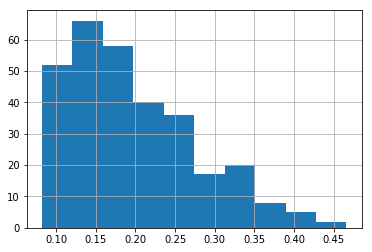

In [19]:
D=pd.DataFrame(return_dict.copy())
D.mean().hist()

In [ ]:
# samples = pd.read_csv("PTSD_cognet_test.csv")
# samples = samples.drop(['record_id', 'PTSDDx'], axis=1)
# samples.to_csv("PTSD_cognet_test_processed.csv", index=False)
# samples = pd.read_csv("PTSD_cognet_test_processed.csv")
# samples